In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
from IPython.core.display import display,HTML
try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata
import networkx as nx
import itertools
import seaborn as sns   ### https://seaborn.pydata.org/tutorial/categorical.html
    
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser


import plotly.plotly as py
from plotly.graph_objs import *


import plotly.tools as tls
tls.set_credentials_file(username='juliettapc', api_key='S3F0wIl4ix9z4GplKfx7')  # my plotly account credentials



In [2]:
path="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/"
df = pd.read_excel(open(path+'NICO_0511_anonymized.xlsx','rb'),na_values=["NAN","-1"],names = ['folder_id', 'user_id', 'email_domain', 'num_adds', 'num_edits', 'num_deletes', 'num_folder_members', 'major_content_type' ,'major_content_ext',  'age_folder_days' ])



In [ ]:
print df.shape    #(57740, 11)
for c in df.columns:
        print c

# Original column names:
    
    
# Shared folder number
# User responsible for action
# Email domain associated with user responsible for action
# Number of file adds from '2014-05-01' - '2017-05-01' 
# Number of file edits from '2014-05-01' - '2017-05-01' 
# Number of file deletes from '2014-05-01' - '2017-05-01' 
# Number of shared folder members
# Major content type
# Major file extension
# Age of shared folder

In [ ]:
#df = df.rename(columns={'Shared folder number': 'folder_id', 'User responsible for action': 'user_id', 'Email domain associated with user responsible for action': 'email_domain', "Number of file adds from '2014-05-01' - '2017-05-01'": 'num_adds', "Number of file edits from '2014-05-01' - '2017-05-01'": 'num_edits', "Number of file deletes from '2014-05-01' - '2017-05-01'": 'num_deletes', 'Number of shared folder members': 'num_folder_members', 'Major content type': 'major_content_type' ,'Major file extension': 'major_content_ext', 'Age of shared folder': 'age_folder_days' })

print df.shape
df.head()


In [ ]:

#df.sort_values(by='folder_id', axis=0, ascending=True)


#df.groupby("folder_id").size().sort_values()


In [ ]:
df[df.folder_id == 2476590757]#2174241653] #2335433869]

#table[table.column_name == some_value]

In [ ]:
print "number unique folder_ids:",len(df.folder_id.unique())
print "number unique user_ids:",len(df.user_id.unique())
print "number unique email domains:",len(df.email_domain.unique())
print "number unique major content ext:",len(df.major_content_ext.unique())


In [ ]:
# print "age folder in days"
# lista=list(df[["age_folder_days"]].values.flatten())  # this has repetitions (same folder multiple rows)
# sns.distplot(lista, kde=False, rug=True)

In [ ]:
print "max value in each column:"
df["age_folder_days"].median()

In [ ]:
print "max value in each column:"
df.max()

In [ ]:


for tipo in df.major_content_type.unique():
    print tipo
    print df[df.major_content_type == tipo].max(),"\n"
   

In [ ]:
for tipo in df.major_content_type.unique():
    print tipo,
    print "\t# records:",len(df.num_edits[df.major_content_type == tipo]),"\tnum edits:",df.num_edits[df.major_content_type == tipo].median(),
    print "  num adds:",df.num_adds[df.major_content_type == tipo].median(),
    print "  num deletes:",df.num_deletes[df.major_content_type == tipo].median(),"\n"

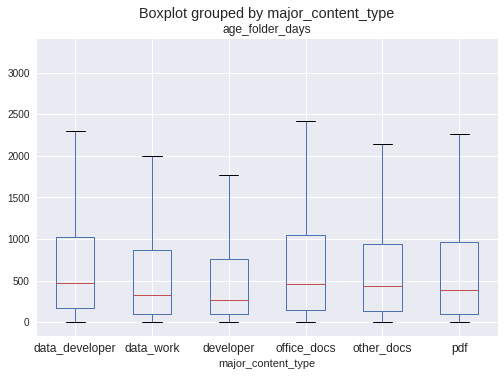

In [3]:
df_selection = df[(df.major_content_type == "office_docs") | (df.major_content_type == "other_docs")| (df.major_content_type == "pdf")| (df.major_content_type == "data_work")| (df.major_content_type == "developer")| (df.major_content_type == "data_developer")]





#sns.jointplot(x="num_adds", y="num_edits", data=df_selection, kind="kde");

df_selection.boxplot(column=["age_folder_days"],by="major_content_type")
# df_selection = df[(df.major_content_type == "other_docs") | (df.major_content_type == "office_docs")]


# df_selection.boxplot(column="num_adds", by="major_content_type")

#sns.boxplot(data= df_selection[["num_edits","num_adds","num_deletes" ]])


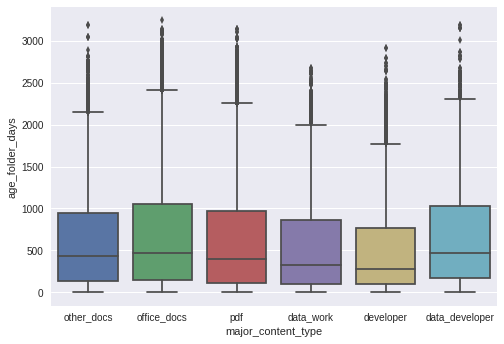

In [4]:
sns.boxplot(x="major_content_type", y="age_folder_days",  data=df_selection)

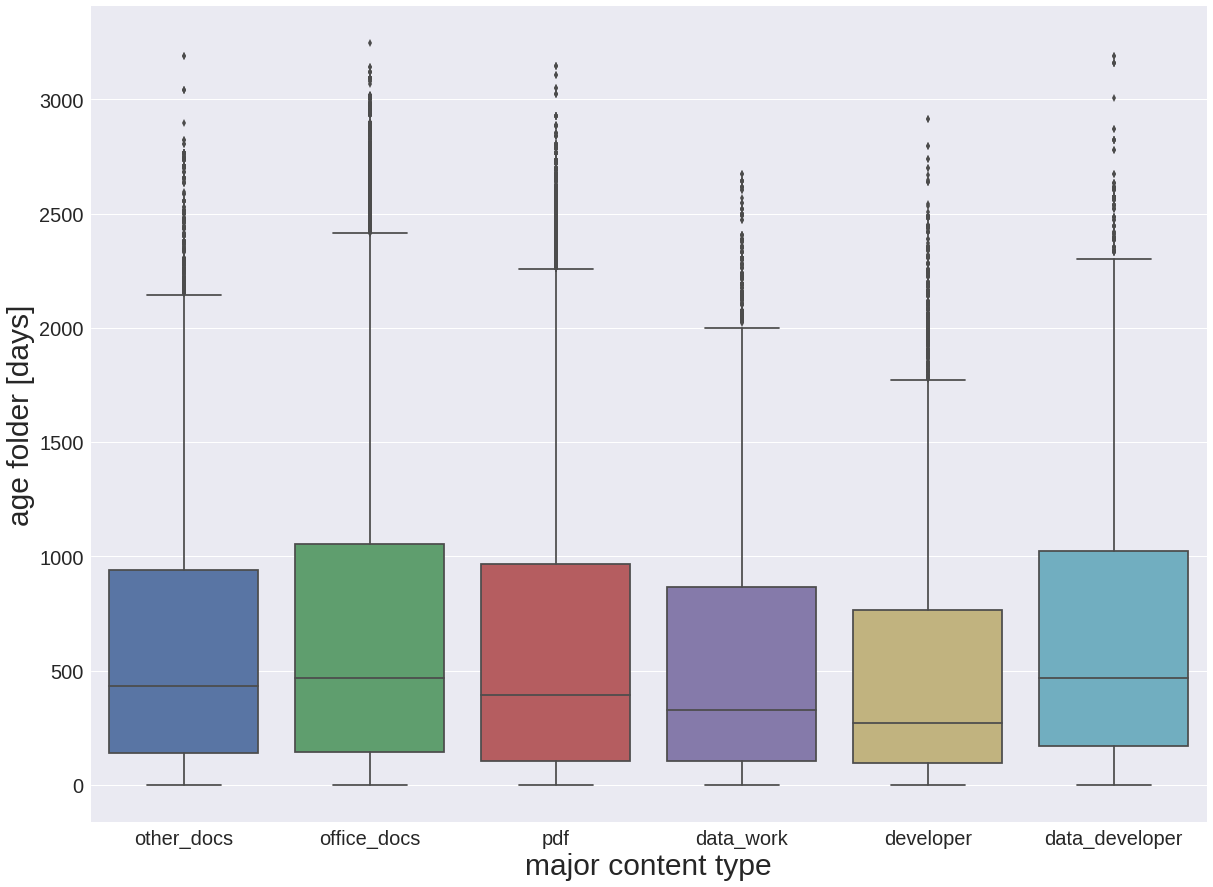

In [5]:
# sns.boxplot(x="major_content_type", y="age_folder_days",  data=df)
# #.set_ylabel("age folder [days]",fontsize=20).set_xlabel("major content type",fontsize=200)#, palette="PRGn")




b = sns.boxplot(x=df_selection["major_content_type"], y=df["age_folder_days"])
#b.axes.set_title("Title",fontsize=50)
b.set_ylabel("age folder [days]",fontsize=30)
b.set_xlabel("major content type",fontsize=30)
b.tick_params(axis="y",labelsize=20)
b.tick_params(axis="x",labelsize=20)
plt.figure(figsize=(4500,1))



fig = b.get_figure()
fig.set_size_inches(20, 15)
fig.savefig("/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/output.png")

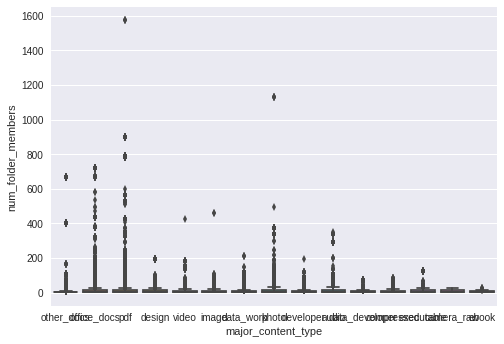

In [6]:
sns.boxplot(x="major_content_type", y="num_folder_members",  data=df)#, palette="PRGn")

In [ ]:
sns.distplot(df_selection["age_folder_days"], bins=2000)

In [ ]:
#sns.barplot(x="total_publications", y="num_external_collaborators", hue='is_business_user',data=df);
#sns.boxplot(x="total_publications", y="num_external_collaborators", data=df);
#sns.boxplot( hue='major_content_ext', data= df[["num_edits","num_adds","num_deletes"]]);

In [ ]:
print "types of files:\n" 
for item in sorted(list(df.major_content_type.unique())):
    print item, "   ",
    
    
print "\n\next of files:\n" 
for item in sorted(list(df.major_content_ext.unique())):
    print item,

In [ ]:
print "number of files of each ext:"
df.groupby("major_content_ext").size().sort_values()

In [ ]:
print "number of instances of each type being the majority in a folder:"
df.groupby("major_content_type").size().sort_values()

In [ ]:
# instead of using matplotlib:
df.plot.scatter(x="age_folder_days", y='num_folder_members', alpha=0.1)
#df.groupby('ranking30_University').num_external_collaborators.mean().plot(kind='bar')
df.plot.scatter(x="num_adds", y='num_edits', alpha=0.5)


##### for printing out the histograms:    
Nbins=1000#quantiles
df[["age_folder_days"]].plot.hist(bins=Nbins, alpha=0.5,logy=True,logx=False, cumulative=False,yticks=[100,1000,2000,5000,10000])
# fig = plt.gcf()
# fig.savefig(path_merge_linux.split("Merged_LinkedIn_WoS/")[0]+'hist_'+columna+"_"+str(Nbins)+'bins.png', dpi=600)
#####



In [ ]:

Nbins=200

df[["num_adds"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)#,yticks=[50000,100000,250000,500000,750000,1000000,100000000])

df[["num_edits"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)

df[["num_deletes"]].plot.hist(bins=Nbins, alpha=0.5, logy=True, cumulative=False)


In [8]:

df.head(10)

,folder_id,user_id,email_domain,num_adds,num_edits,num_deletes,num_folder_members,major_content_type,major_content_ext,age_folder_days
0,2335433869,16158291,*montana.edu subdomain,24,282,0,4,other_docs,tex,420
1,2174241653,8151657,*tamu.edu subdomain,256,272,62,2,office_docs,docx,512
2,2476590757,8151657,*tamu.edu subdomain,240,408,108,4,office_docs,docx,322
3,2615915145,368961753,*tamu.edu subdomain,0,40,0,14,pdf,pdf,232
4,2748274007,8151657,*tamu.edu subdomain,134,344,20,2,office_docs,docx,138
5,434776253,8151657,*tamu.edu subdomain,3536,14604,2268,4,office_docs,docx,1573
6,455530165,8151657,*tamu.edu subdomain,6076,28802,3798,4,pdf,pdf,1549
7,1446132433,516609739,*tamu.edu subdomain,312,24,72,5,office_docs,docx,941
8,1493785393,8151657,*tamu.edu subdomain,4508,11432,1602,4,design,eps,910
9,1493785393,531379272,*tamu.edu subdomain,4308,552,86,4,design,eps,910


In [51]:
## i get one row per author with all relevant info

# def format_affil(affil_string):
    
#     return affil_string.replace('Univ,','University,')
G=nx.Graph()

dict_folder_list_users={}

print df.shape
cont=0
for row in df.iterrows():
        #print row[1]
    folder=row[1]["folder_id"]
    user_id=row[1]["user_id"]
        #print folder_id, user_id
    
    try: 
        dict_folder_list_users[folder].append(user_id)
    except:
        dict_folder_list_users[folder]=[]
        dict_folder_list_users[folder].append(user_id)
    
    cont +=1
    if cont % 100000 ==0:
        print cont
        
    
print "size of dict:",len(dict_folder_list_users)





for folder in dict_folder_list_users:
    dict_folder_list_users[folder]=list(set(dict_folder_list_users[folder]))  # remove possible duplicates

    lista=dict_folder_list_users[folder]

  
    if len(lista)>1:
        
        lista_pares=itertools.combinations(lista, 2)
        
        
        for item in lista_pares:
            e1=item[0]
            e2=item[1]
            G.add_edge(e1,e2)
           # print "added edge:",e1, e2
    else:
        user_id=lista[0]
        
        G.add_node(user_id)

GC = max(nx.connected_component_subgraphs(G), key=len)



print "done.  N:", len(G.nodes()),"  L:", len(G.edges()),"\n  GC:"
print "     N:", len(GC.nodes()), "  L:", len(GC.edges())



(497553, 10)
100000
200000
300000
400000
size of dict: 184479
done.  N: 302957   L: 1095516 
  GC:
     N: 83187   L: 422176


In [52]:
###### i relabel the nodes so the plotly works later
mapping={}
cont=0
for n in G.nodes():
    mapping[n]=cont
    cont +=1
    

#print G.nodes()
G=nx.relabel_nodes(G,mapping, copy=False)

In [53]:

##### i get a layout for the plotting of the network
dict_pos=nx.random_layout(G,dim=2)     #dict_pos=nx.fruchterman_reingold_layout(G,dim=2)

#### i and save is as attribute of the nodes themselves
nx.set_node_attributes(G, 'pos', pos)




print len(dict_pos)

302957


In [54]:
with open(path+"first_network.pickle",'wb') as f:
    %time    pickle.dump(G, f)
print "written:",path+"first_network.pickle"


CPU times: user 13.4 s, sys: 200 ms, total: 13.6 s
Wall time: 13.7 s
written: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/first_network.pickle


In [55]:
with open(path+"dict_position_first_network.pickle",'wb') as f:
    %time    pickle.dump(dict_pos, f)


print "written:",path+"dict_position_first_network.pickle"

CPU times: user 2.78 s, sys: 32 ms, total: 2.82 s
Wall time: 3.66 s
written: /home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/dict_position_first_network.pickle


302957

83187

83187

In [56]:
pos=dict_pos
#pos=nx.get_node_attributes(G,'pos') # returns a dictionary of attributes keyed by node



dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)
print "done calculating shortest path"







edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

print "done with node_trace"





for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

    
    
    
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

print "done with enumerate"




fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    text="",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))


print "done setting up fig"

py.iplot(fig, filename='networkx')

done calculating shortest path
done with node_trace
done with enumerate
done setting up fig


SysCallError: (32, 'EPIPE')

In [ ]:
# lista=[]
# for node in G.nodes():
#     lista.append(len(G.neighbors(node)))

# sns.distplot(lista, bins=2000, rug=True)

In [ ]:
# # instead of using matplotlib:
# #df.plot.scatter(x="id", y='total_publications', alpha=0.1)
# #df.groupby('ranking30_University').num_external_collaborators.mean().plot(kind='bar')
# std = df.groupby('total_publications').num_external_collaborators.std()
# df.groupby('total_publications').num_external_collaborators.mean().plot(kind='bar',yerr=std)


In [ ]:
# use seaborn instead
# https://seaborn.pydata.org/tutorial/categorical.html

# sns.barplot(x="total_publications", y="num_external_collaborators", hue='is_business_user',data=df);
# sns.boxplot(x="total_publications", y="num_external_collaborators", data=df);
# sns.violinplot(x="total_publications", y="num_external_collaborators", hue='ranking30_University', data=df);

In [ ]:
# sns.pairplot(df[['num_internal_collaborators','num_external_collaborators','quota_bytes']])  # pairwise scatter plots and distribution for each variable in the diagonal positions

In [ ]:
# sns.jointplot(x="num_external_collaborators", y="num_internal_collaborators", data=df, kind="reg")
# # 


In [ ]:
# lista=list(df[["quota_bytes"]].values.flatten())

# sns.distplot(lista, kde=False, rug=True)

In [ ]:

# def create_network(input_df,G):
    
   
#    # print len(input_df)
#     for row in input_df.iterrows():
#         #print row[1]
#         folder_id=row[1]["folder_id"]
#         user_id=row[1]["user_id"]
#         #print folder_id, user_id
    
  
#     if len(input_df)>1:
        
#         lista=list(input_df.user_id.unique())
       
        
#         lista_pares=itertools.combinations(lista, 2)
        
        
#         for item in lista_pares:
#             e1=item[0]
#             e2=item[1]
#             G.add_edge(e1,e2)
#            # print "added edge:",e1, e2
#     else:
#         user_id=input_df.user_id.iloc[0]
        
#         G.add_node(user_id)
#         #print "added node", user_id

    #raw_input()   

#     #return pd.DataFrame({'author_names':list_names,'affiliations':list_affil,'seqs':list_seq,'tot_n_pub':tot_n_pubs})
#     affiliations = [format_affil(a) for a in input_df.affiliation.unique()]
    
#     resultado = pd.Series({'author_names':input_df.author_name.unique(),'lastname':lastname,'affiliations':affiliations,\
#                          'seqs':input_df.seq.values,'uids':lista,'tot_n_pub':tot_n_pubs}) #input_df.affiliation.unique()
#     #if the returned values of some of the columns are list, use SERIES instead of DATAFRAME
    
    
    
    
    #return resultado
  #'author_id':author_id,  no need, Univit is the index


#grouped = FINAL.head(10000).groupby('author_groupedid').apply(grouping)
# grouped = df.groupby('folder_id').apply(create_network,G)

#grouped= df.reset_index()  # to reset the indexes (instead of using the authour_id as index, i create a new one)

# most functions do not modify the df in places, i need to do result2 = result.apply etc...
